In [1]:
cd C:\Users\Luv Rathore\Desktop\vidooly

C:\Users\Luv Rathore\Desktop\vidooly


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#from keras.utils import to_categorical

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from datetime import datetime
from sklearn.model_selection import train_test_split

In [4]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier,XGBRegressor
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


C:\Users\Luv Rathore\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
def Null_count(data) :
    print(data.apply(lambda x: sum(x.isnull()),axis=0))
def Unique_val(data): 
    print(data.apply(lambda x: len(x.unique())))
def sigmoid(x):
     return (1 / (1 + np.exp(-x)))

In [6]:
train = pd.read_csv('ad_org_train.csv')
test = pd.read_csv('ad_org_test.csv')

In [7]:
train['views'] = pd.to_numeric(train['views'].replace('F',np.nan))
train['likes'] = pd.to_numeric(train['likes'].replace('F',np.nan))
train['dislikes'] = pd.to_numeric(train['dislikes'].replace('F',np.nan))
train['comment'] = pd.to_numeric(train['comment'].replace('F',np.nan))

In [8]:
new = train['duration'].str.split("PT",n=1,expand = True)

train['duration'] = new[1]

newh = train['duration'].str.split("H",n=2,expand = True)

train['hour'] = np.nan

list1 = [];
for i in range(0,len(newh[1])):
    if (newh[1][i] != None): 
        list1.append(newh[0][i]);
    else :
        list1.append(0);

train['hour'] = list1

for i in range(0,len(newh[1])):
    if newh[1][i] == None :
        newh[1][i] = newh[0][i];
    else :
        continue;

newm = newh[1].str.split("M",n=0,expand = True)

train['min'] = np.nan;
list2 = [];
for i in range(0,len(newm[0])):
    if "S" in newm[0][i]:
        list2.append(0);
    else :
        list2.append(newm[0][i]);

train['min'] = list2;
#newm[0].str.contains('S',regex = False)

for i in range(0,len(newm[1])):
    if newm[1][i] == None :
        newm[1][i] = newm[0][i];
    else :
        continue;

news = newm[1].str.split("S",n=0,expand = True)
train['sec'] = np.nan;
train['sec'] = news;

In [9]:
train['hour'] = pd.to_numeric(train['hour'])
train['min'] = pd.to_numeric(train['min'])
train['sec'] = pd.to_numeric(train['sec'])
train['sec'] = train['sec'].fillna(0)

train['duration'] = 3600*train['hour']+60*train['min']+train['sec']

In [10]:
#train['category'].unique().tolist()
encode = {'category':{'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}}
train.replace(encode,inplace = True)

#train['period'] = (pd.to_datetime(train['published']) - pd.to_datetime(train['published']).min()).dt.days
train['period'] = (pd.to_datetime(train['published']).dt.year - pd.to_datetime(train['published']).dt.year.min())

train = train.drop(columns=['hour','min','sec','vidid','published'])

In [11]:
array = ['views','likes','dislikes','comment']

for col in array :
    temp = train[train[col].notnull()]
    
    X_temp = temp.loc[:, temp.columns != col]
    Y_temp = temp[col]

    temp2 = train[train[col].isnull()]
    X_temp2 = temp2.loc[:, temp2.columns != col]

    model = XGBRegressor()
    model.fit(X_temp, Y_temp)


    output = model.predict(data=X_temp2)
    for i in range(0,len(output)) :
        if output[i] < 0 :
            output[i] = 0;
        else :
            continue;
    output = output.astype(int)

    
    add = [];
    for i in range(0,len(train[col])):
        if train[col].isnull()[i] == True :
            add.append(i);
        else :
            continue;

    for i in range(0,len(add)):
        train[col][add[i]] = output[i]     

C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a 

In [12]:
test_id = test['vidid']

In [13]:
test['views'] = pd.to_numeric(test['views'].replace('F',np.nan))
test['likes'] = pd.to_numeric(test['likes'].replace('F',np.nan))
test['dislikes'] = pd.to_numeric(test['dislikes'].replace('F',np.nan))
test['comment'] = pd.to_numeric(test['comment'].replace('F',np.nan))

In [14]:
new = test['duration'].str.split("PT",n=1,expand = True)

test['duration'] = new[1]

newh = test['duration'].str.split("H",n=2,expand = True)

test['hour'] = np.nan

list1 = [];
for i in range(0,len(newh[1])):
    if (newh[1][i] != None): 
        list1.append(newh[0][i]);
    else :
        list1.append(0);

test['hour'] = list1

for i in range(0,len(newh[1])):
    if newh[1][i] == None :
        newh[1][i] = newh[0][i];
    else :
        continue;

newm = newh[1].str.split("M",n=0,expand = True)

test['min'] = np.nan;
list2 = [];
for i in range(0,len(newm[0])):
    if "S" in newm[0][i]:
        list2.append(0);
    else :
        list2.append(newm[0][i]);

test['min'] = list2;
#newm[0].str.contains('S',regex = False)

for i in range(0,len(newm[1])):
    if newm[1][i] == None :
        newm[1][i] = newm[0][i];
    else :
        continue;

news = newm[1].str.split("S",n=0,expand = True)
test['sec'] = np.nan;
test['sec'] = news;

In [15]:
test['hour'] = pd.to_numeric(test['hour'])
test['min'] = pd.to_numeric(test['min'])
test['sec'] = pd.to_numeric(test['sec'])
test['sec'] = test['sec'].fillna(0);

test['duration'] = 3600*test['hour']+60*test['min']+test['sec']

In [16]:
encode = {'category':{'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}}
test.replace(encode,inplace = True)

test['period'] = (pd.to_datetime(test['published']).dt.year - pd.to_datetime(test['published']).dt.year.min())
test = test.drop(columns=['hour','min','sec','published','vidid'])

In [17]:
array = ['views','likes','dislikes','comment']

for col in array :
    temp = test[test[col].notnull()]
    X_temp = temp.loc[:, temp.columns != col]
    Y_temp = temp[col]

    temp2 = test[test[col].isnull()]
    X_temp2 = temp2.loc[:, temp2.columns != col]

    model = XGBRegressor()
    model.fit(X_temp, Y_temp)


    output = model.predict(data=X_temp2)
    for i in range(0,len(output)) :
        if output[i] < 0 :
            output[i] = 0;
        else :
            continue;
    output = output.astype(int)

    
    add = [];
    for i in range(0,len(test[col])):
        if test[col].isnull()[i] == True :
            add.append(i);
        else :
            continue;

    for i in range(0,len(add)):
        test[col][add[i]] = output[i]     

C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Luv Rathore\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a 

In [18]:
train['var1'] = train['likes']-train['dislikes']
test['var1'] = test['likes']-test['dislikes']

In [19]:
X_train = train.loc[:, train.columns != 'adview']
Y_train = train['adview']

In [20]:
model = RandomForestRegressor(n_estimators=200, max_depth=15,criterion='mse',n_jobs=-1,min_samples_leaf = 5,min_samples_split=10)

In [21]:
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
predicted = model.predict(test)

In [23]:
test['vidid'] = test_id
test['adview'] = predicted.astype(int)


In [24]:
test[['vidid','adview']].to_csv('prediction.csv',index=False)

In [137]:
# train_x,test_x,train_y,test_y = train_test_split(X_train,Y_train, test_size = 0.20)

# model1 =  RandomForestRegressor(n_estimators=200, max_depth=15,criterion='mse',n_jobs=-1,min_samples_leaf = 5,min_samples_split=10)
# model1.fit(train_x,train_y)


# output = model1.predict(test_x)
# output = output.astype(int)
# print(output.min())

# print(mean_squared_error(test_y,output))
# print(mean_absolute_error(test_y,output))

1
523932116.5426667
2767.5406666666668


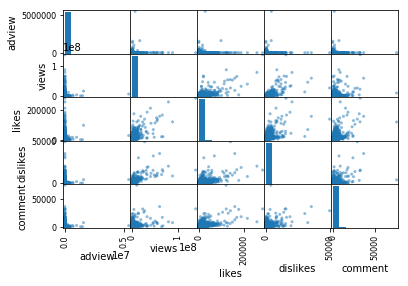